# Optymalizacja hiperparametrów

Wczytanie potrzebnych bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb 

import warnings
import sklearn

from sklearn.metrics import roc_auc_score, accuracy_score # wczytanie metryk sukcesu
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 250
seed = 2019
warnings.simplefilter("ignore")

print('numpy ' + str(np.__version__))
print('pandas ' + str(pd.__version__))
print('seaborn ' + str(pd.__version__))
print('xgboost ' + str(pd.__version__))
print('sklearn ' + str(sklearn.__version__))

numpy 1.14.5
pandas 0.24.2
seaborn 0.24.2
xgboost 0.24.2
sklearn 0.20.3


Wczytanie pliku z danymi. W poniższym przykładzie użyłem danych z konkursu Kaggle: <br> 
https://www.kaggle.com/c/santander-customer-transaction-prediction/data

In [2]:
df = pd.read_csv('../data_raw/train.csv')
print(df.shape)
df.head()

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

#### Funkcje pomocnicze

In [3]:
def get_feats(df): #dzieki temu nie będę brał niepotrzebnych kolumn do modelowania
    feats = [f for f in df.columns if f not in ['ID_code','target']]
    return feats

def get_X(df): #do pobierania macierzy X czyli cech które będę starał się opisywac modelem
    return df[ get_feats(df) ].values

def get_y(df, target_var='target'): #wektor y - informacja o predycji. w przypadku przykładowych danych to ":target"
    return df[target_var].values

#### Podział zbioru do nauki modelu, testowy i walidacyjny

In [4]:
X, y = get_X(df), get_y(df) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2019)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2019)

print('TRAIN:',X_train.shape, y_train.shape)
print('TEST:',X_test.shape, y_test.shape)
print('VALIDATION:',X_val.shape, y_val.shape)

TRAIN: (120000, 200) (120000,)
TEST: (40000, 200) (40000,)
VALIDATION: (40000, 200) (40000,)


#### Walidacja modelu
Zdefiniujmy sobie funkcję dzięki którym od razu sprawdzimy jak model działa.<br>
W tym przypadku przyglądnijmy się metryce GINI.

In [5]:
def create_measures(y,y_pred): 
    score_test = roc_auc_score(y, y_pred)
    Gini_index = 2*score_test - 1
    
    d = {'AUC': [round(score_test,4)], 'GINI': [round(Gini_index,4)]}
    d = pd.DataFrame.from_dict(d)
    return d

def calculating_metrics(X_train, X_val, X_oot, y_train, y_val, y_oot):
    test = create_measures(y_train,model.predict_proba(X_train)[:, 1])
    val = create_measures(y_val,model.predict_proba(X_val)[:, 1])
    oot = create_measures(y_oot,model.predict_proba(X_oot)[:, 1]) 

    measures =  pd.concat([test,val,oot]).set_index([pd.Index(['TRAIN', 'VAL', 'OOT'])]) 
    
    return measures

#### Budowa modelu XGB na domyślnych parametrach

In [6]:
model = xgb.XGBClassifier(tree_method='gpu_hist')
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.8618,0.7236
VAL,0.8271,0.6542
OOT,0.8330,0.6659


### Grid Search

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
grid_param = {  
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.05, 0.1, 0.25, 0.5],
    'subsample': [0.75, 1.00], 
    'tree_method': ['gpu_hist']    
}

In [9]:
print(4*4*4*2)

128


In [10]:
grid_search = GridSearchCV(estimator=model,  
                     param_grid=grid_param,
                     scoring='roc_auc')

In [11]:
grid_search.fit(X_train, y_train) 

best_parameters = grid_search.best_params_  
print(best_parameters) 

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.75, 'tree_method': 'gpu_hist'}


In [12]:
model = xgb.XGBClassifier(**best_parameters)
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.9625,0.9250
VAL,0.8872,0.7743
OOT,0.8893,0.7787


In [13]:
GS_results = pd.DataFrame(grid_search.cv_results_)
GS_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,param_tree_method,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.927680,0.006464,0.081022,0.000463,0.05,4,50,0.75,gpu_hist,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.766104,0.765055,0.760859,0.764006,0.002266,127,0.799312,0.798138,0.800407,0.799286,0.000927
1,0.981021,0.068542,0.081362,0.002029,0.05,4,50,1,gpu_hist,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.759030,0.763020,0.755335,0.759128,0.003138,128,0.793934,0.797439,0.799289,0.796887,0.002221
2,1.210635,0.013439,0.106923,0.000367,0.05,4,100,0.75,gpu_hist,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.809919,0.813059,0.804162,0.809046,0.003684,116,0.855552,0.860388,0.859106,0.858349,0.002046
3,1.232666,0.008130,0.107586,0.000270,0.05,4,100,1,gpu_hist,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.807670,0.809825,0.799418,0.805638,0.004485,117,0.855859,0.860550,0.858918,0.858443,0.001944
4,2.115632,0.051965,0.161368,0.001163,0.05,4,200,0.75,gpu_hist,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.847199,0.849941,0.842179,0.846440,0.003214,69,0.906116,0.909011,0.910266,0.908464,0.001738


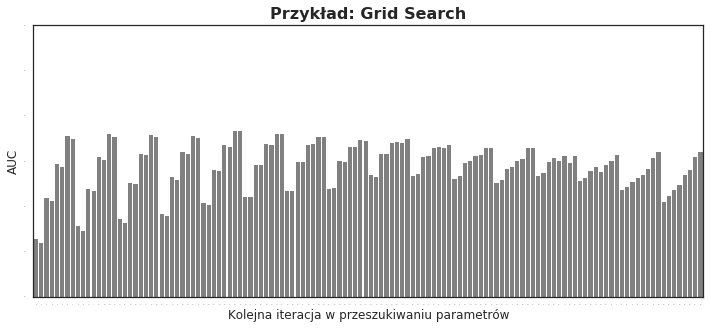

In [14]:
sns.set(style="white", rc={'figure.figsize':(12,5), 'axes.grid': False}, font_scale=0)
ax = sns.barplot(x=GS_results.index, y='mean_test_score', data=GS_results, color="gray")

ax.set_title("Przykład: Grid Search",fontsize=16,weight='bold')
ax.set_xlabel("Kolejna iteracja w przeszukiwaniu parametrów",fontsize=12)
ax.set_ylabel("AUC", fontsize=12)
ax.set(ylim=(0.7, 1.0));

### Random Search

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
random_param = {
    'max_depth': range(1,9),
    'learning_rate': np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000),
    'n_estimators': range(100, 1000, 50),
    'gamma': np.linspace(0, 1, 10),
    'min_child_weight': range(1,100,5),
    'subsample': np.linspace(0.5, 1, 101),
    'colsample_bytree': np.linspace(0.5, 1, 101),
    'colsample_bylevel': np.linspace(0.5, 1, 101),
    'reg_alpha': np.linspace(0, 2),
    'reg_lambda': np.linspace(0, 2),
    'tree_method': ['gpu_hist']
}

In [35]:
model = xgb.XGBClassifier()

random_search = RandomizedSearchCV(estimator=model
                                 , param_distributions=random_param
                                 , n_iter=4*4*4*2
                                 , scoring='roc_auc' )

In [36]:
random_search.fit(X=X_train, y=y_train)

best_parameters = random_search.best_params_  
print(best_parameters) 

{'tree_method': 'gpu_hist', 'subsample': 0.51, 'reg_lambda': 1.8367346938775508, 'reg_alpha': 1.3061224489795917, 'n_estimators': 800, 'min_child_weight': 91, 'max_depth': 5, 'learning_rate': 0.062239357309395296, 'gamma': 0.4444444444444444, 'colsample_bytree': 0.75, 'colsample_bylevel': 0.95}


In [37]:
model = xgb.XGBClassifier(**best_parameters)
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.9433,0.8866
VAL,0.8922,0.7845
OOT,0.8959,0.7919


In [38]:
RS_results = pd.DataFrame(random_search.cv_results_)
RS_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tree_method,param_subsample,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,param_colsample_bylevel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.127529,0.055261,0.287415,0.000633,gpu_hist,0.66,1.7551,0.44898,650,11,3,0.0434419,0.444444,0.765,0.595,"{'tree_method': 'gpu_hist', 'subsample': 0.66,...",0.879137,0.878527,0.873437,0.877034,0.002556,40,0.921499,0.923363,0.924562,0.923142,0.001260
1,6.227743,0.019453,0.779975,0.002174,gpu_hist,0.67,0.653061,0.163265,950,76,7,0.00680933,0.444444,0.87,0.51,"{'tree_method': 'gpu_hist', 'subsample': 0.67,...",0.853031,0.852901,0.845120,0.850351,0.003699,85,0.897515,0.899134,0.899658,0.898769,0.000912
2,1.629249,0.002117,0.211346,0.000257,gpu_hist,0.595,1.18367,0.897959,650,36,2,0.041869,0.444444,0.705,0.705,"{'tree_method': 'gpu_hist', 'subsample': 0.595...",0.866803,0.867269,0.859781,0.864618,0.003425,62,0.889146,0.890763,0.891818,0.890575,0.001099
3,1.769842,0.012597,0.236970,0.000480,gpu_hist,0.52,0.204082,1.59184,250,96,7,0.0249844,0.888889,0.655,0.92,"{'tree_method': 'gpu_hist', 'subsample': 0.52,...",0.848582,0.848299,0.839424,0.845435,0.004252,90,0.880316,0.881830,0.883205,0.881784,0.001180
4,3.506671,0.012588,0.450489,0.001020,gpu_hist,0.9,0.367347,0.938776,700,91,5,0.083213,0.666667,0.875,0.715,"{'tree_method': 'gpu_hist', 'subsample': 0.9, ...",0.892096,0.890095,0.886136,0.889442,0.002477,5,0.968031,0.969799,0.969300,0.969043,0.000744


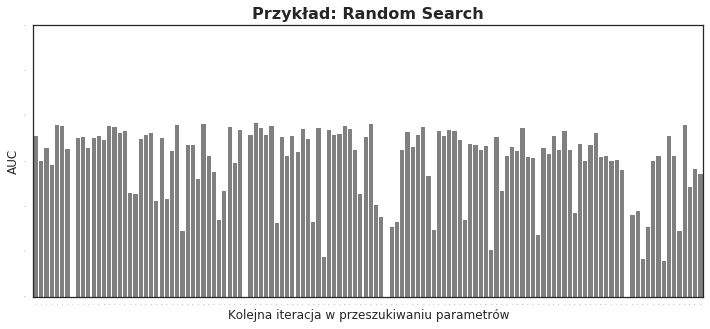

In [39]:
sns.set(style="white", rc={'figure.figsize':(12,5), 'axes.grid': False}, font_scale=0)
ax = sns.barplot(x=RS_results.index, y='mean_test_score', data=RS_results, color="gray")

ax.set_title("Przykład: Random Search",fontsize=16,weight='bold')
ax.set_xlabel("Kolejna iteracja w przeszukiwaniu parametrów",fontsize=12)
ax.set_ylabel("AUC", fontsize=12)
ax.set(ylim=(0.7, 1.0));

### Baysian Search

In [40]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials, partial # procedury do optymalizacji hiperparametrów

In [41]:
# parametr mówiący ile iteracji najpierw losujemy zanim zaczniemy optymalizować parametry
n_startup_jobs = 4*4*2*1 # liczba całkowita > 0

# parametr ile łącznie robimy iteracji 
max_evals = 4*4*4*2 # liczba całkowita > n_startup_jobs

BS_results = []

In [42]:
# Określenie zakresu do przeszukiwania dla hiperparametrów.
# Można modyfikować dowolnie według uznania
space ={
    'learning_rate': hp.uniform ('x_learning_rate', 0.01, 0.5),
    'max_depth': hp.quniform ('x_max_depth', 1, 9, 1),
    'n_estimators': hp.quniform ('x_n_estimators', 100, 1000, 50),
    'min_child_weight': hp.quniform ('x_min_child_weight', 0, 100, 1),
    'gamma': hp.loguniform ('x_gamma', 0.0, 2.0),
    'subsample': hp.uniform ('x_subsample', 0.5, 1.0),    
    'colsample_bytree': hp.uniform ('x_colsample_bytree', 0.5, 1.0),
    'colsample_bylevel': hp.uniform ('x_colsample_bylevel', 0.5, 1.0),
    'reg_alpha': hp.loguniform ('x_reg_alpha', 0.0, 2.0),
    'reg_lambda': hp.loguniform ('x_reg_lambda', 0.0, 2.0),
}

In [43]:
def objective(space):
    xgb_params = {
        # ogólne
        'learning_rate': space['learning_rate'],
        'max_depth': int(space['max_depth']),
        'n_estimators': int(space['n_estimators']),
        'min_child_weight': int(space['min_child_weight']),
        'gamma': space['gamma'],
        'seed': 2019,
        # do walki z overfiting
        'subsample': space['subsample'],
        'colsample_bytree': space['colsample_bytree'],
        'colsample_bylevel': space['colsample_bylevel'],
        # regularyzacja
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        # pozostałe
        'metric': 'auc',  
        'eval_metric': 'auc', 
        'tree_method': 'gpu_hist'
    }

    model = xgb.XGBClassifier(**xgb_params)
    %time model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    
    score = - roc_auc_score(y_test, y_pred)
    
    BS_results.append([roc_auc_score(y_test, y_pred), xgb_params])
    
    print("SCORE: {0}".format(roc_auc_score(y_test, y_pred)))
    
    return{'loss':score, 'status': STATUS_OK }

<div class="alert alert-block alert-danger">
UWAGA! Hyperopt szuka minimum. Zatem jak Twoja metryka im wyższa tym lepiej (jak AUC) wówczas należy przemnożyć ją przez -1 jak w powyższym przykładzie:  score = - roc_auc_score(y_test, y_pred).<br>
</div>

In [44]:
trials = Trials()
best_params = fmin(fn=objective,
                   space=space,
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials)

print("The best params: ", best_params)

CPU times: user 1.87 s, sys: 687 ms, total: 2.56 s
Wall time: 2.57 s
SCORE: 0.8680561826646037
CPU times: user 4.72 s, sys: 1.5 s, total: 6.22 s
Wall time: 6.22 s
SCORE: 0.8775939016973284
CPU times: user 1.53 s, sys: 567 ms, total: 2.1 s
Wall time: 2.09 s
SCORE: 0.8899357160674447
CPU times: user 2.37 s, sys: 806 ms, total: 3.18 s
Wall time: 3.18 s
SCORE: 0.8572744789739796
CPU times: user 5.44 s, sys: 1.81 s, total: 7.25 s
Wall time: 7.25 s
SCORE: 0.8901453631767173
CPU times: user 3.63 s, sys: 1.43 s, total: 5.06 s
Wall time: 5.06 s
SCORE: 0.8838704750053251
CPU times: user 9.3 s, sys: 2.98 s, total: 12.3 s
Wall time: 12.3 s
SCORE: 0.8814238108050539
CPU times: user 3.84 s, sys: 839 ms, total: 4.68 s
Wall time: 4.68 s
SCORE: 0.8692700660881849
CPU times: user 743 ms, sys: 252 ms, total: 995 ms
Wall time: 994 ms
SCORE: 0.8569442587641118
CPU times: user 3.08 s, sys: 1.05 s, total: 4.13 s
Wall time: 4.12 s
SCORE: 0.8568534750950123
CPU times: user 7.26 s, sys: 2.38 s, total: 9.64 s
Wa

CPU times: user 6.13 s, sys: 1.99 s, total: 8.12 s
Wall time: 8.11 s
SCORE: 0.8719119854202402
CPU times: user 2.48 s, sys: 1.01 s, total: 3.48 s
Wall time: 3.48 s
SCORE: 0.8801047202042624
CPU times: user 1.12 s, sys: 501 ms, total: 1.62 s
Wall time: 1.62 s
SCORE: 0.8917319911097659
CPU times: user 1.86 s, sys: 754 ms, total: 2.62 s
Wall time: 2.62 s
SCORE: 0.8830765794739852
CPU times: user 3.52 s, sys: 1.23 s, total: 4.74 s
Wall time: 4.74 s
SCORE: 0.875063253932219
CPU times: user 1.17 s, sys: 421 ms, total: 1.59 s
Wall time: 1.59 s
SCORE: 0.8875341126301864
CPU times: user 2.53 s, sys: 1.04 s, total: 3.56 s
Wall time: 3.56 s
SCORE: 0.8695116957589211
CPU times: user 1.22 s, sys: 509 ms, total: 1.73 s
Wall time: 1.72 s
SCORE: 0.8933236254049933
CPU times: user 3.64 s, sys: 1.33 s, total: 4.97 s
Wall time: 4.97 s
SCORE: 0.8627481249789797
CPU times: user 1.96 s, sys: 775 ms, total: 2.74 s
Wall time: 2.74 s
SCORE: 0.8800831917958721
CPU times: user 1.43 s, sys: 628 ms, total: 2.06 s


In [45]:
BS_results = pd.DataFrame(BS_results)
BS_results.columns = ['score','params']
BS_results.head()

,score,params
0,0.868056,"{'learning_rate': 0.03808810753340928, 'max_de..."
1,0.877594,"{'learning_rate': 0.19582031905145278, 'max_de..."
2,0.889936,"{'learning_rate': 0.1528042623883467, 'max_dep..."
3,0.857274,"{'learning_rate': 0.4739350270885256, 'max_dep..."
4,0.890145,"{'learning_rate': 0.09616115814543878, 'max_de..."


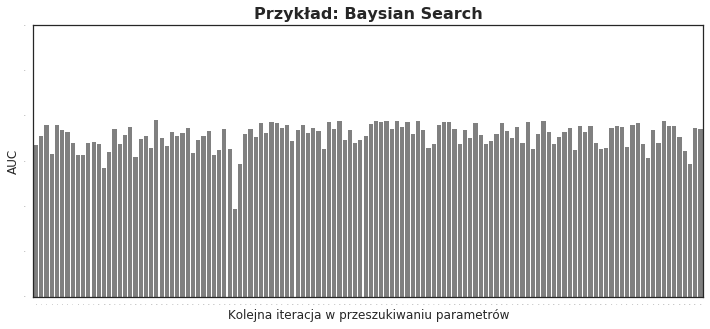

In [46]:
sns.set(style="white", rc={'figure.figsize':(12,5), 'axes.grid': False}, font_scale=0)
ax = sns.barplot(x=BS_results.index, y='score', data=BS_results, color="gray")

ax.set_title("Przykład: Baysian Search",fontsize=16,weight='bold')
ax.set_xlabel("Kolejna iteracja w przeszukiwaniu parametrów",fontsize=12)
ax.set_ylabel("AUC", fontsize=12)
ax.set(ylim=(0.7, 1.0));

In [47]:
best_params

{'x_colsample_bylevel': 0.8623877485439386,
 'x_colsample_bytree': 0.7389197245332271,
 'x_gamma': 3.4430670991133705,
 'x_learning_rate': 0.43792732671175894,
 'x_max_depth': 1.0,
 'x_min_child_weight': 90.0,
 'x_n_estimators': 850.0,
 'x_reg_alpha': 4.069597437502552,
 'x_reg_lambda': 4.260805469567687,
 'x_subsample': 0.7722362118142974}

In [49]:
model = xgb.XGBClassifier(**{
 'colsample_bylevel': 0.8623877485439386,
 'colsample_bytree': 0.7389197245332271,
 'gamma': 3.4430670991133705,
 'learning_rate': 0.43792732671175894,
 'max_depth': 1,
 'min_child_weight': 90.0,
 'n_estimators': 850,
 'reg_alpha': 4.069597437502552,
 'reg_lambda': 4.260805469567687,
 'subsample': 0.7722362118142974,
 'tree_method': 'gpu_hist'
})
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

,AUC,GINI
TRAIN,0.9120,0.8241
VAL,0.8934,0.7869
OOT,0.8995,0.7989


In [50]:
GS_results.to_csv('GS_results.csv')
RS_results.to_csv('RS_results.csv')
BS_results.to_csv('BS_results.csv')